### Comparaison condition dual/single pour les 2 tâches 

In [6]:
library(ggplot2)
library(ez)
library(plyr)
library(dplyr)
library(xlsx)


In [7]:
donnees<-read.csv2("Tableau_donnees.csv", dec=".")
head(donnees)

donnees$occlusionDurationNum<-donnees$occlusionDuration
donnees$occlusionDuration<-as.factor(donnees$occlusionDuration)
donnees$Condition<-ordered(donnees$Condition, levels=c("Single", "Dual"))


,participantsNum,participants,occlusionDuration,Estimation,Task,Condition,ErrorTime,FinalValue,Error
,<int>,<fct>,<int>,<dbl>,<fct>,<fct>,<dbl>,<int>,<dbl>
1,1,AA24,2,6.2,Number,Dual,0.8,7,0.8
2,1,AA24,2,5.8,Number,Dual,1.2,7,1.2
3,1,AA24,2,7.0,Number,Dual,0.0,7,0.0
4,1,AA24,2,6.4,Number,Dual,0.6,7,0.6
5,1,AA24,2,5.9,Number,Dual,1.1,7,1.1
6,1,AA24,2,6.2,Number,Dual,0.8,7,0.8


### Histogramme de repartition (normalite)

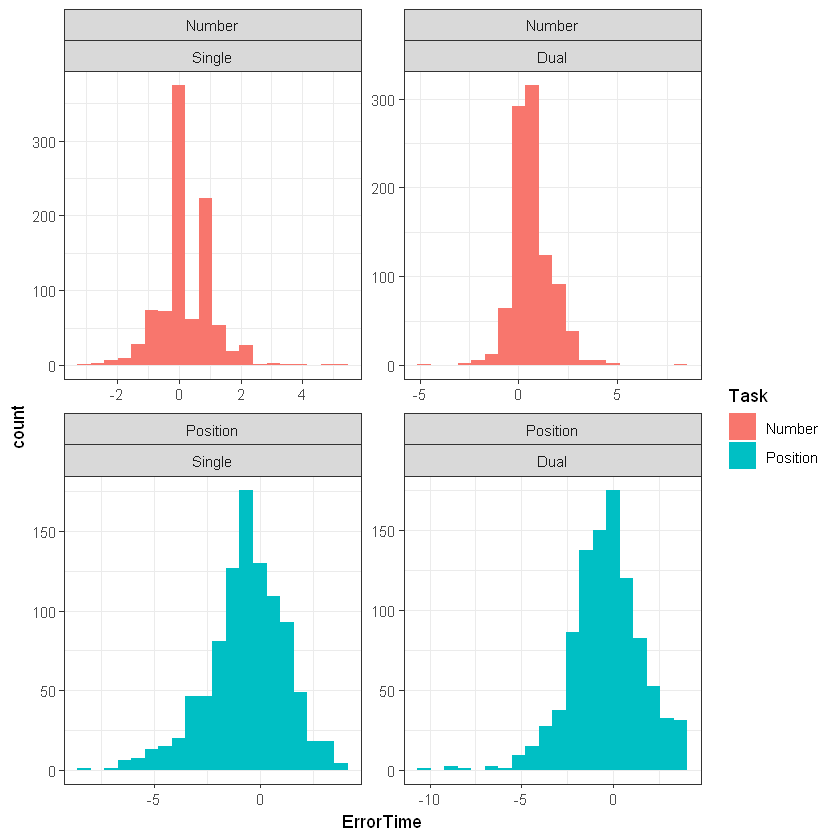

In [22]:
ggplot(donnees, aes(ErrorTime, fill=Task))+
  geom_histogram(bins=20)+
  facet_wrap(~Task+Condition, scales = "free")+
  theme_bw()

donneesResume<-donnees%>%
  group_by(participantsNum,participants, occlusionDuration, occlusionDurationNum, Task, Condition, FinalValue) %>%
  summarise(MeanErrorTime = mean(Estimation), SDErrorTime = sd(ErrorTime))

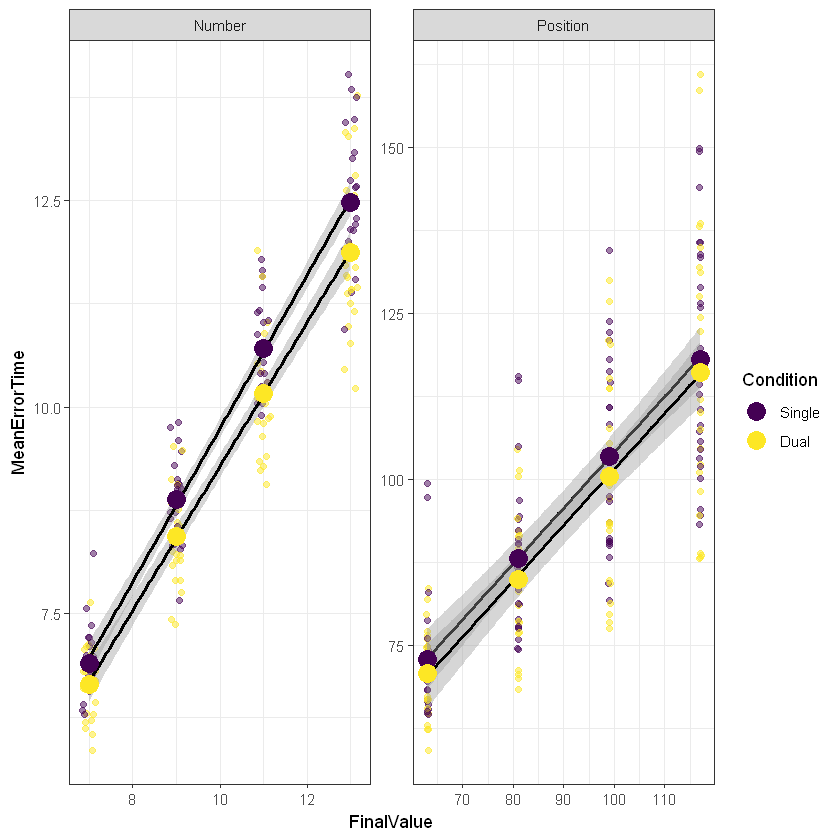

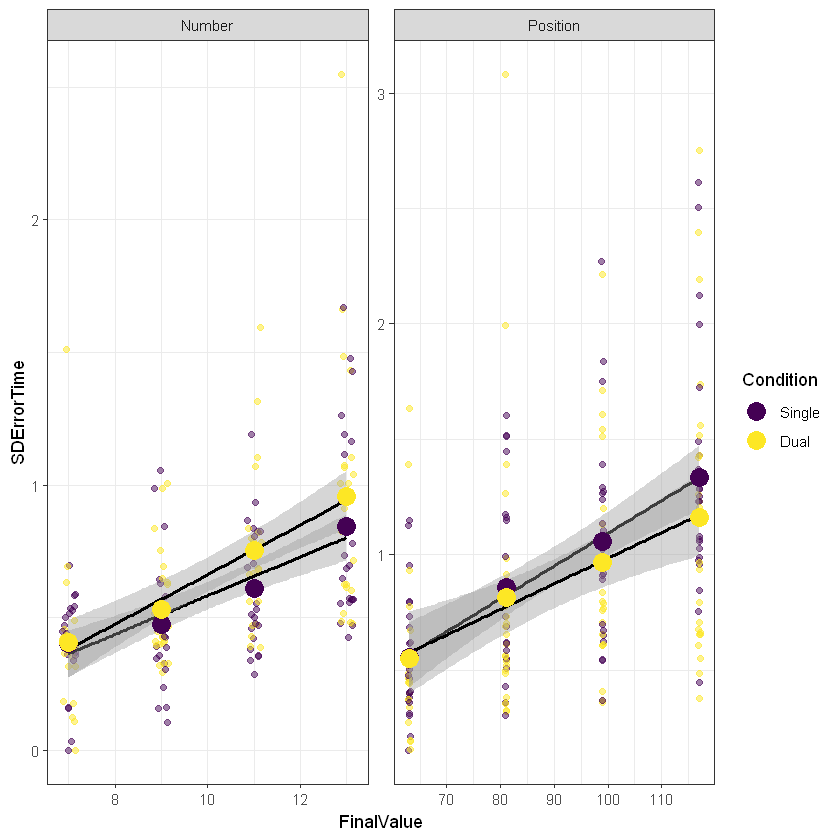

In [16]:
ggplot(donneesResume, aes(FinalValue, MeanErrorTime, color=Condition))+
  geom_jitter(alpha=.5, width=.15)+
  geom_smooth(method="lm",se=TRUE, size= 1, colour = "black", aes(group=Condition))+
  stat_summary(geom = "point", fun.y = "mean", aes(colour = Condition, group = Condition), size = 5)+
  facet_wrap(~Task, scales = "free")+
  theme_bw()

ggplot(donneesResume, aes(FinalValue, SDErrorTime, color=Condition))+
  geom_jitter(alpha=.5, width=.15)+
  geom_smooth(method="lm", se=TRUE, size= 1,colour="black", aes(colour = Condition, group=Condition))+
  stat_summary(geom = "point", fun.y = "mean", aes(colour = Condition, group = Condition), size = 5)+
  facet_wrap(~Task, scales = "free")+
  theme_bw()


### Regression linéaire

In [11]:
iMax<-max(donneesResume$participantsNum)
iMax


R <- iMax
intermediaireNumberSingle<- numeric(R)
PenteNumberSingle<- numeric(R)
InterceptNumberSingle<- numeric(R)

intermediaireNumberDual<- numeric(R)
PenteNumberDual<- numeric(R)
InterceptNumberDual<- numeric(R)

intermediairePositionSingle<- numeric(R)
PentePositionSingle<- numeric(R)
InterceptPositionSingle<- numeric(R)

intermediairePositionDual<- numeric(R)
PentePositionDual<- numeric(R)
InterceptPositionDual<- numeric(R)

NomSujetInt2<- numeric(R)


listeNom<-unique(donneesResume$participants)

for (i in 1:iMax) {
  intermediaireNumberSingle<-coef(summary(lm(donneesResume$SDErrorTime[donneesResume$participantsNum==i 
                                                                       & donneesResume$Task=="Number" 
                                                                       & donneesResume$Condition=="Single"]~
                                               donneesResume$FinalValue[donneesResume$participantsNum==i 
                                                                        & donneesResume$Task=="Number" 
                                                                        & donneesResume$Condition=="Single"])))
  
  InterceptNumberSingle[i]<-intermediaireNumberSingle[1,1]
  PenteNumberSingle[i]<-intermediaireNumberSingle[2,1]
  
  
  intermediaireNumberDual<-coef(summary(lm(donneesResume$SDErrorTime[donneesResume$participantsNum==i 
                                                                     & donneesResume$Task=="Number" 
                                                                     & donneesResume$Condition=="Dual"]~
                                             donneesResume$FinalValue[donneesResume$participantsNum==i 
                                                                      & donneesResume$Task=="Number" 
                                                                      & donneesResume$Condition=="Dual"])))
  
  InterceptNumberDual[i]<-intermediaireNumberDual[1,1]
  PenteNumberDual[i]<-intermediaireNumberDual[2,1]
  
  
  intermediairePositionSingle<-coef(summary(lm(donneesResume$SDErrorTime[donneesResume$participantsNum==i 
                                                                         & donneesResume$Task=="Position" 
                                                                         & donneesResume$Condition=="Single"]~
                                                 donneesResume$FinalValue[donneesResume$participantsNum==i 
                                                                          & donneesResume$Task=="Position" 
                                                                          & donneesResume$Condition=="Single"])))
  
  InterceptPositionSingle[i]<-intermediairePositionSingle[1,1]
  PentePositionSingle[i]<-intermediairePositionSingle[2,1]
  
  
  intermediairePositionDual<-coef(summary(lm(donneesResume$SDErrorTime[donneesResume$participantsNum==i 
                                                                       & donneesResume$Task=="Position" 
                                                                       & donneesResume$Condition=="Dual"]~
                                               donneesResume$FinalValue[donneesResume$participantsNum==i 
                                                                        & donneesResume$Task=="Position" 
                                                                        & donneesResume$Condition=="Dual"])))
  
  InterceptPositionDual[i]<-intermediairePositionDual[1,1]
  PentePositionDual[i]<-intermediairePositionDual[2,1]
  
  
  NomSujetInt<-donneesResume[donneesResume[,"participantsNum"]==i,]
  NomSujetInt2[i]<-NomSujetInt[1,2]
  
  
}




matriceRegression<-data.frame(listeNom, PenteNumberSingle, InterceptNumberSingle, PenteNumberDual, InterceptNumberDual, PentePositionSingle, InterceptPositionSingle, PentePositionDual, InterceptPositionDual)
matriceRegression

[1] 24

listeNom,PenteNumberSingle,InterceptNumberSingle,PenteNumberDual,InterceptNumberDual,PentePositionSingle,InterceptPositionSingle,PentePositionDual,InterceptPositionDual
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
AA24,0.028085904,0.21961418,0.17624160,-0.805057471,0.012991454,-0.57788696,-9.402815e-05,0.37478075
AD19,0.063989303,0.05519704,0.06353183,0.034219730,0.007875312,-0.15199981,8.347073e-03,-0.29139112
AM01,0.063039287,-0.13178201,0.12092989,-0.537760590,0.007687986,0.31663798,3.773256e-02,-2.06387747
CG04,0.094877623,-0.53993180,0.36281730,-2.763180397,0.011751515,0.01595703,1.746971e-02,-0.47105609
CH13,0.107098624,-0.22487020,0.14016765,-0.670146323,0.027863775,-1.11154530,3.160181e-02,-0.69123456
DF06,0.026489473,0.26333100,0.01198526,0.640116302,0.025960475,-0.81376128,7.798416e-03,1.18119074
EM17,0.006620158,0.42928816,0.13080615,-0.665967449,0.027802599,-1.46276687,1.431160e-02,-0.52971721
EP09,0.021723905,0.22514575,0.04235341,0.039447120,0.009685143,-0.26461104,1.001925e-02,-0.39594850
GJ11,0.052886595,-0.08609544,0.05661335,0.001583837,0.036360858,-1.50206175,5.900831e-03,0.17727711


#### Numbers

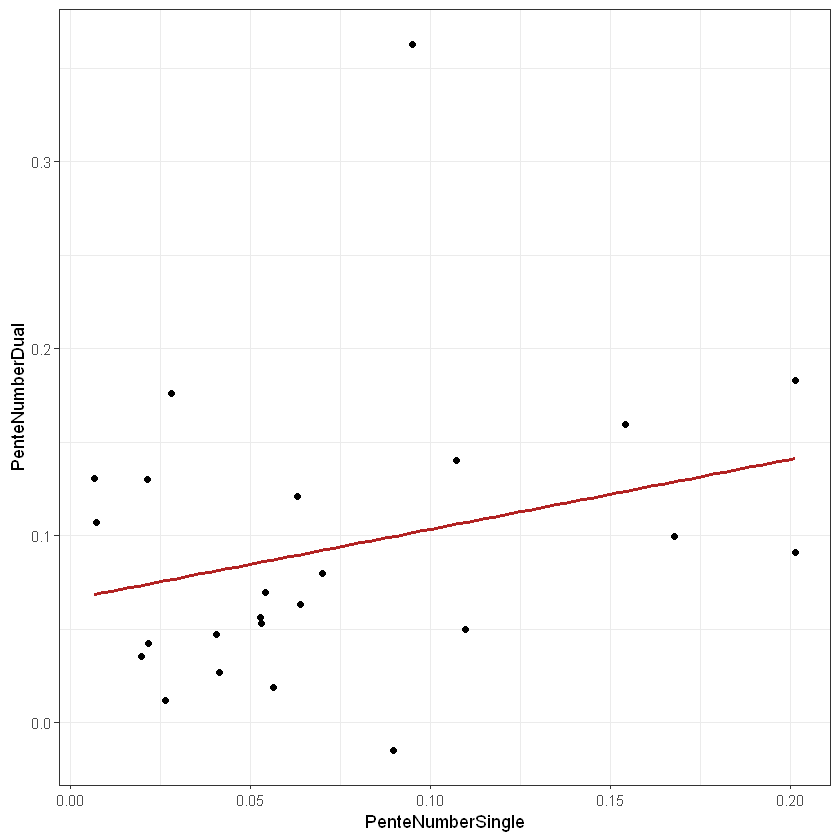

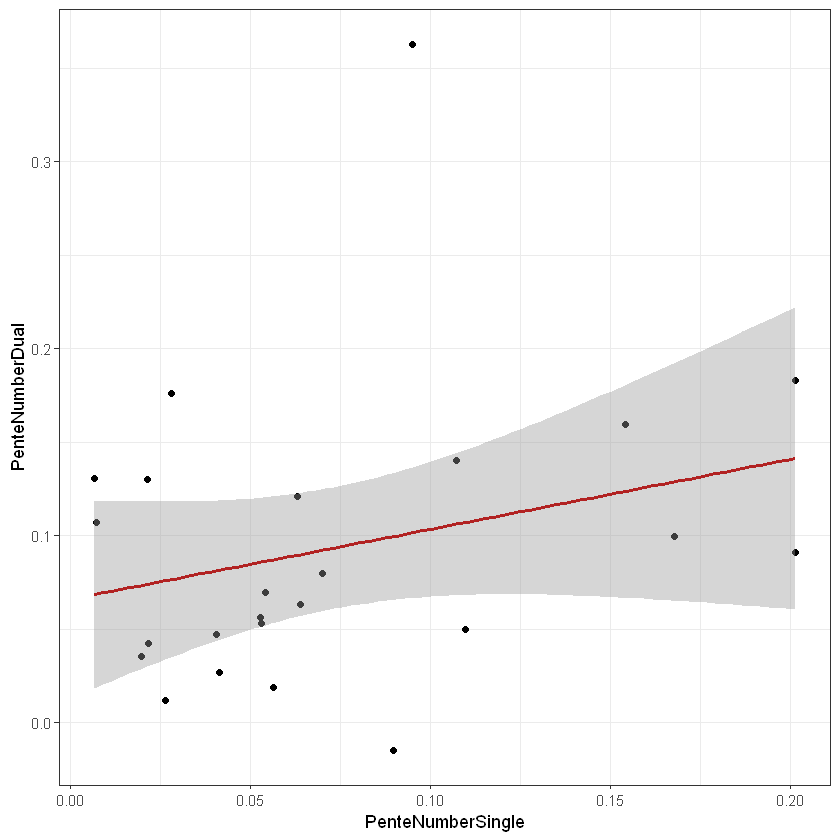

In [14]:
ggplot(matriceRegression,aes(PenteNumberSingle,PenteNumberDual))+
  geom_point()+
  geom_smooth(method="lm",se=FALSE,size=1,color="firebrick")+
  theme_bw()

#meme graphique avec intervalle de confiance

ggplot(matriceRegression,aes(PenteNumberSingle,PenteNumberDual))+
  geom_point()+
  geom_smooth(method="lm",size=1,color="firebrick")+
  theme_bw()


#### Position

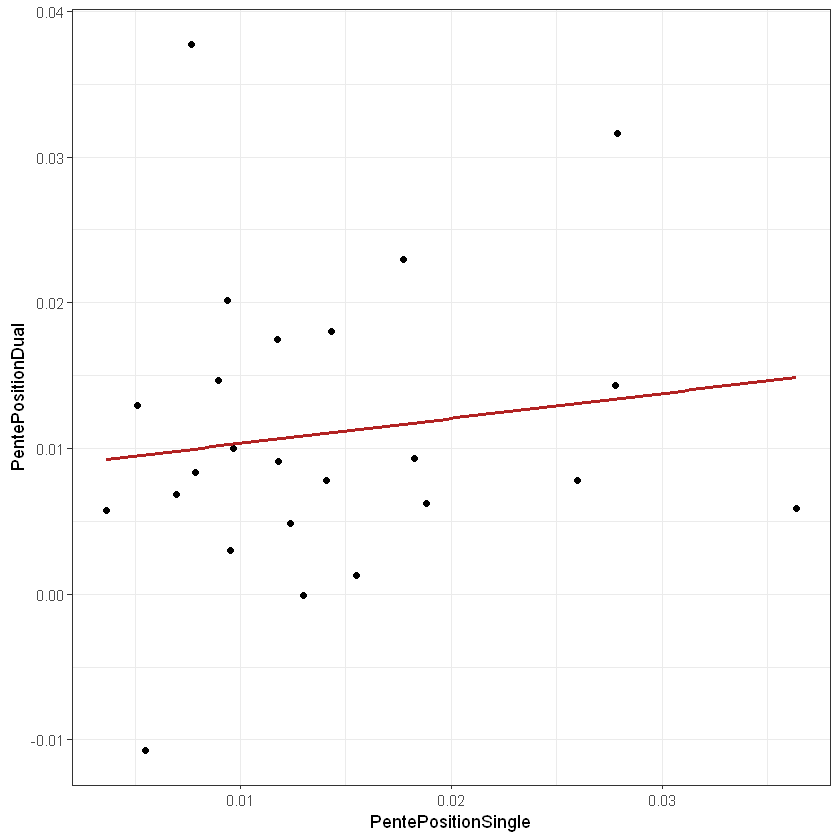

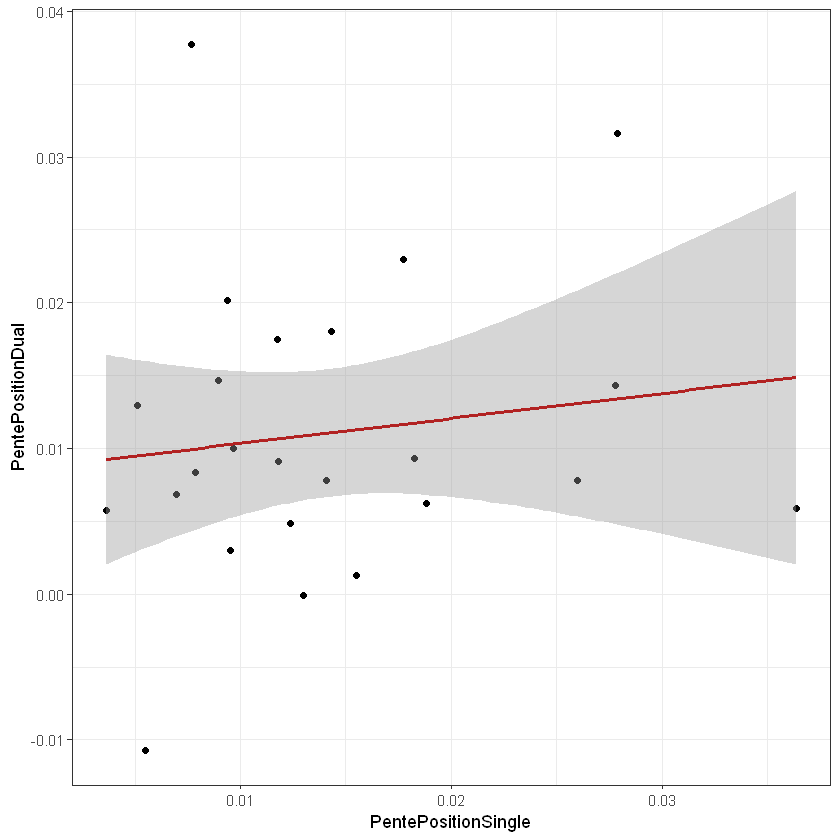

In [18]:
ggplot(matriceRegression,aes(PentePositionSingle,PentePositionDual))+
  geom_point()+
  geom_smooth(method = "lm",se=FALSE,size=1,color="firebrick")+
  theme_bw()

#meme graphique avec intervalle de confiance

ggplot(matriceRegression,aes(PentePositionSingle,PentePositionDual))+
  geom_point()+
  geom_smooth(method = "lm",size=1,color="firebrick")+
  theme_bw()


 On cherche a savoir s'il y a une difference signiticatifive entre réaliser une tâche de prediction de nombre/position 'seule' ou en même temps

In [19]:
lm(PenteNumberSingle~PenteNumberDual,matriceRegression)
lm(matriceRegression$PentePositionSingle~matriceRegression$PentePositionDual)



Call:
lm(formula = PenteNumberSingle ~ PenteNumberDual, data = matriceRegression)

Coefficients:
    (Intercept)  PenteNumberDual  
        0.05401          0.20351  



Call:
lm(formula = matriceRegression$PentePositionSingle ~ matriceRegression$PentePositionDual)

Coefficients:
                        (Intercept)  matriceRegression$PentePositionDual  
                            0.01293                              0.11201  


In [20]:
cor.test(matriceRegression$PenteNumberDual,matriceRegression$PenteNumberSingle)
cor.test(matriceRegression$PentePositionDual,matriceRegression$PentePositionSingle)



	Pearson's product-moment correlation

data:  matriceRegression$PenteNumberDual and matriceRegression$PenteNumberSingle
t = 1.347, df = 22, p-value = 0.1917
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.1433279  0.6113516
sample estimates:
      cor 
0.2760282 



	Pearson's product-moment correlation

data:  matriceRegression$PentePositionDual and matriceRegression$PentePositionSingle
t = 0.65695, df = 22, p-value = 0.518
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.2803765  0.5133793
sample estimates:
      cor 
0.1387085 


In [23]:
aov.SDErrorTime<- ezANOVA(donneesResume,
                          dv = SDErrorTime,
                          wid = participants,
                          # between= .(),
                          within= .(Task, Condition,occlusionDuration),
                          type = 3,
                          return_aov=TRUE)

aov.SDErrorTime


$ANOVA
                            Effect DFn DFd            F            p p<.05
2                             Task   1  23 17.419294888 3.652447e-04     *
3                        Condition   1  23  0.001278564 9.717846e-01      
4                occlusionDuration   3  69 63.406915677 8.505962e-20     *
5                   Task:Condition   1  23  3.251194763 8.448961e-02      
6           Task:occlusionDuration   3  69  2.751667352 4.914975e-02     *
7      Condition:occlusionDuration   3  69  0.163842546 9.203585e-01      
8 Task:Condition:occlusionDuration   3  69  1.471063783 2.300253e-01      
           ges
2 1.231359e-01
3 3.323154e-06
4 2.451764e-01
5 1.017776e-02
6 1.148848e-02
7 6.770246e-04
8 5.009372e-03

$`Mauchly's Test for Sphericity`
                            Effect         W          p p<.05
4                occlusionDuration 0.5114795 0.01251699     *
6           Task:occlusionDuration 0.8319431 0.55035889      
7      Condition:occlusionDuration 0.6018033 0.051055